# TP2 - LINEAR REGRESSION 

In [1]:
# Change here using YOUR own first and last names
fn1 = "Laura Manuela"
ln1 = "Castaneda Medina"
filename = "_".join(map(lambda s: s.strip().lower(), ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

For the first question, we load a standard dataset from ``sklearn.datasets`` named ``fetch_california_housing``. This dataset has only $p = 8$ variables.    

In [2]:
# load a standard dataset from sklearn.datasets named fetch_california_housing
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

# print the keys of the dataset
print(california.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


1. Estimate the coefficients with the expression of the normal equaitons seen in class. Code two
functions to compute the MSE and the R2 coefficient and compare them with the version of
sklearn for the train and the test sets.

In [3]:
# Estimate the coefficients with the expression of the normal equations

import numpy as np
from numpy.linalg import inv

X = california.data
y = california.target

# Split the dataset into a training set and a test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # add x0 = 1 to each instance
theta_best_train = inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

print(theta_best_train)

[-3.70232777e+01  4.48674910e-01  9.72425752e-03 -1.23323343e-01
  7.83144907e-01 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01
 -4.33708065e-01]


In [5]:
# Code two functions to compute the MSE and the R2 coefficient, not using the sklearn functions

from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = X_train.dot(theta_best_train)

def MSE(y, y_pred):
    return np.sum((y_pred - y)**2) / len(y)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print("MSE_fun Train: ", MSE(y_train, y_pred_train))
print("R2_fun Train: ", R2(y_train, y_pred_train))

# Compare the previous results with the functions from sklearn.metrics

print("MSE_sklearn Train: ", mean_squared_error(y_train, y_pred_train))
print("R2_sklearn Train: ", r2_score(y_train, y_pred_train))

MSE_fun Train:  0.5179331255246697
R2_fun Train:  0.6125511913966952
MSE_sklearn Train:  0.5179331255246697
R2_sklearn Train:  0.6125511913966952


In [6]:
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # add x0 = 1 to each instance
theta_best_test = inv(X_test.T.dot(X_test)).dot(X_test.T).dot(y_test)

print(theta_best_test)

[-3.70025285e+01  4.02930452e-01  8.78351144e-03 -7.02828040e-02
  3.68361198e-01  5.38765316e-06 -6.20859846e-02 -4.33372614e-01
 -4.42071749e-01]


In [7]:
# Code two functions to compute the MSE and the R2 coefficient, not using the sklearn functions

y_pred_test = X_test.dot(theta_best_test)

def MSE(y, y_pred):
    return np.sum((y_pred - y)**2) / len(y)

def R2(y, y_pred):
    return 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print("MSE_fun Test: ", MSE(y_test, y_pred_test))
print("R2_fun Test: ", R2(y_test, y_pred_test))

# Compare the previous results with the functions from sklearn.metrics

print("MSE_sklearn Test: ", mean_squared_error(y_test, y_pred_test))
print("R2_sklearn Test: ", r2_score(y_test, y_pred_test))

MSE_fun Test:  0.5293336127912474
R2_fun Test:  0.5960546504330062
MSE_sklearn Test:  0.5293336127912474
R2_sklearn Test:  0.5960546504330062


2. Finally, give the confidence intervals at level 99% for all the coefficients coding the expression
for the CI seen in session 3

In [8]:
import numpy as np
from scipy import stats

theta = inv(X.T.dot(X)).dot(X.T).dot(y) # theta using the Normal Equation.
y_pred = X.dot(theta) # predicted values.
residuals = y - y_pred # residuals.

n, m = X.shape
sigma_squared = (residuals.T.dot(residuals)) / (n - m)
var_theta = sigma_squared * inv(X.T.dot(X)) # variance of residuals.

stderrs = np.sqrt(np.diag(var_theta)) # standard errors for each coefficient.

alpha = 0.01 
t_crit = stats.t.ppf(1 - alpha / 2, df=n - m) # critical t-value.

# Calculate confidence intervals.
conf_intervals = [(theta[i] - t_crit * stderrs[i], theta[i] + t_crit * stderrs[i]) for i in range(m)]

# Print confidence intervals.
for i, conf_int in enumerate(conf_intervals):
    print(f"Coefficient {i}: {conf_int}")


Coefficient 0: (0.5025457008723915, 0.5244846255137567)
Coefficient 1: (0.014455695388922472, 0.016846526486366347)
Coefficient 2: (-0.1983747528458207, -0.16668178569646566)
Coefficient 3: (0.7880581766219544, 0.9421399366661601)
Coefficient 4: (-5.327807059448073e-06, 2.0912420189797167e-05)
Coefficient 5: (-0.006046384997654209, -0.0033521947038470893)
Coefficient 6: (-0.07318659017316587, -0.054705049558955304)
Coefficient 7: (-0.019317285183888963, -0.013448150168017654)


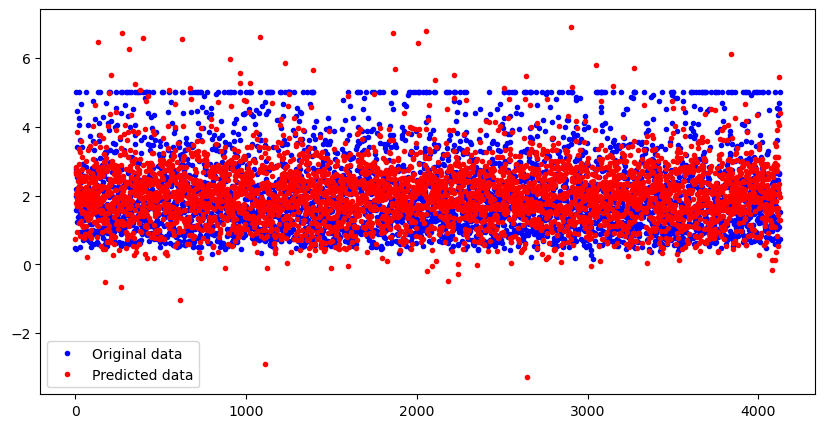

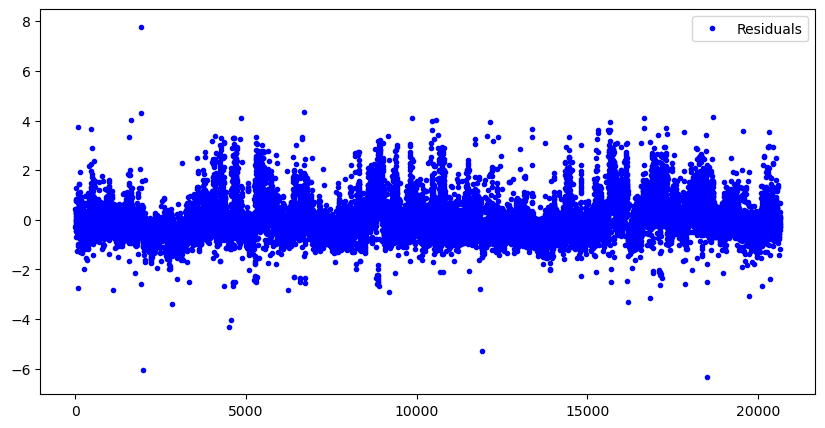

In [9]:
# Plot the original data and the predicted data in the same figure

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, 'b.', label='Original data')
plt.plot(y_pred_test, 'r.', label='Predicted data')
plt.legend()
plt.show()

# Plot the residuals in the same figure

plt.figure(figsize=(10, 5))
plt.plot(residuals, 'b.', label='Residuals')
plt.legend()
plt.show()


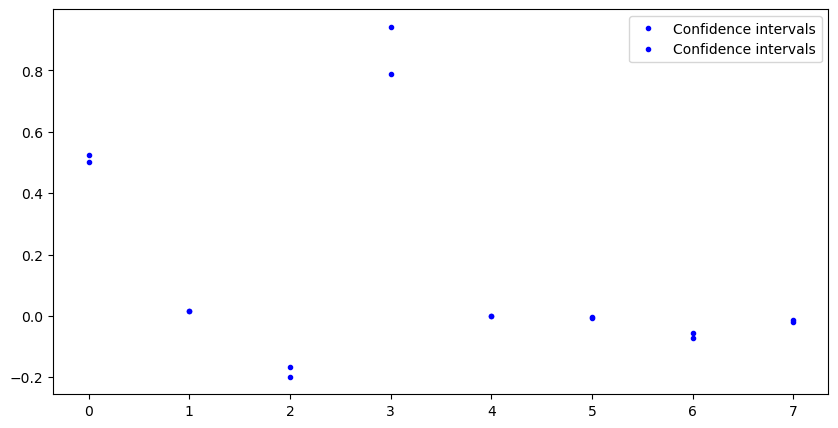

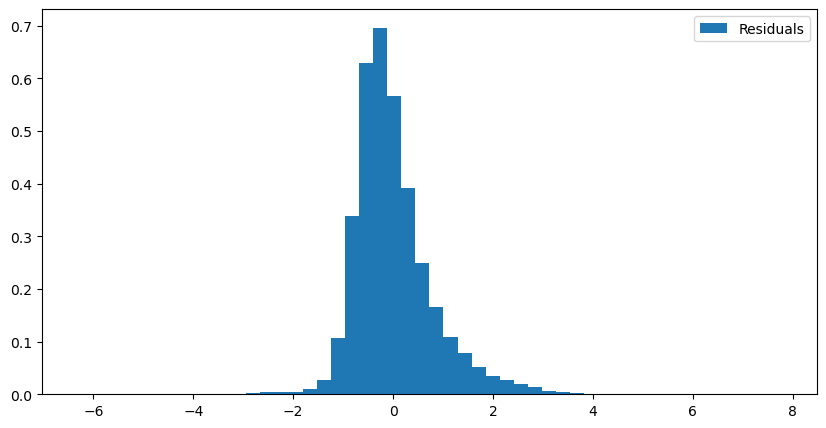

In [10]:
# Plot the CI for the coefficients, some values are too small to be seen in a scatter plot

plt.figure(figsize=(10, 5))
plt.plot(conf_intervals, 'b.', label='Confidence intervals')
plt.legend()
plt.show()

# Plot the histogram of the residuals

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, density=True, label='Residuals')
plt.legend()
plt.show()


For the rest of the TP, we use the dataset in eCampus data. Load and preprocess the data.

In [11]:
# Import dataset data.csv 
import pandas as pd

data = pd.read_csv('data.csv')

# Print the first 5 rows of the dataset
print(data)

     -1.298173374733184726e+00  -1.622490637183908735e-01  \
0                     0.166951                  -0.338060   
1                    -0.416177                  -0.205659   
2                     0.867184                  -0.398667   
3                     1.193282                  -0.936980   
4                     1.513286                   0.072830   
..                         ...                        ...   
436                  -0.270323                  -0.437638   
437                   0.872196                   0.975497   
438                  -0.032586                  -0.571893   
439                  -1.529754                   0.756967   
440                   0.942724                   1.389141   

     1.223379369153350549e+00  1.355554339582927481e+00  \
0                   -0.618867                  0.759366   
1                   -1.282226                  1.675500   
2                    0.093501                  0.025971   
3                   -0.725039  

1. Separate the data in train and test sets: save one fourth of the data as testing (``train_test_split`` from ``sklearn.model_selection`` with the random seed set to 0 and standardize both the training and testing sets using the ``fit_transform`` and transform functions in ``sklearn.preprocessing.StandardScaler``.

In [12]:
# Separate the data in train and test sets Separate the data in train and test sets: 
# save one fourth of the data as testing (``train_test_split`` from ``sklearn.model_selection`` 
# with the random seed set to 0 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize both the training and testing sets using the ``fit_transform`` and transform 
# functions in ``sklearn.preprocessing.StandardScaler``.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2. Fit a regular OLS

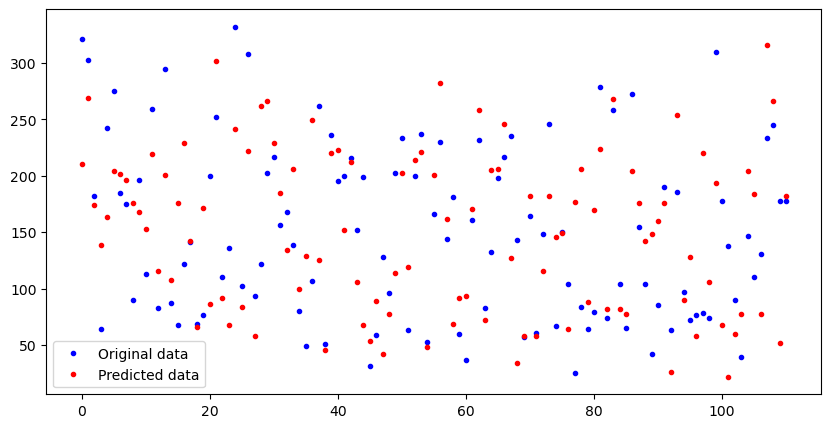

In [13]:
# Fit a regular OLS

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

theta_hat = regressor.fit(X_train, y_train)

# Plot the original data and the predicted data in the same figure

plt.figure(figsize=(10, 5))
plt.plot(y_test, 'b.', label='Original data')
plt.plot(regressor.predict(X_test), 'r.', label='Predicted data')
plt.legend()
plt.show()

# Variable selection

Program the method of forward variable selection based on hypothesis tests for regression coef-
ficients. This method starts from an empty set of variables S and at each iteration selects one
variable relevant for predicting *y* and includes it in the set S. It runs until a halting condition is
met. 

The coding process is as follows:

1. Develop a function that, given a dataset $X \in R^{n \times p}$ and $y$, fits $p$ linear regression models, each using only feature $X_j$ to predict $y$. For each model, conduct a test of no effect, as discussed in session 3, and compute the p-value of the test. This function should return the coefficient with the smallest p-value. Explain the significance of the p-value in this context.

2. Apply the function iteratively. At each iteration, select the feature Xf with the smallest p-value and:
    - Include it in the set S.
    - Remove it from X.
    - Subtract from y the residuals of the model fit with feature Xf. Elaborate on the reason for subtracting the residuals.

3. Add a halting condition to the algorithm: Stop adding features to the set S when the p-value exceeds 0.05. Plot the p-values for every coefficient for the first 5 iterations (all in the same plot)

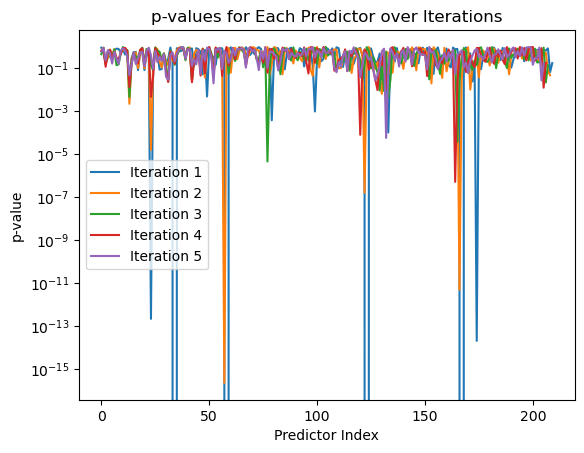

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def fit_single_predictor_models(X, y):
    
    # Returns:
    # int: Index of the predictor with the smallest p-value.
    # float: The smallest p-value.
    # numpy.ndarray: Coefficients of the best predictor model.

    n, p = X.shape
    p_values = []
    best_t_stat = 0
    best_p_value = 1
    best_coefficient_index = -1
    best_model_coefficients = np.zeros(p)

    # Iterate over each predictor
    for j in range(p):

        # Fit model for predictor j
        X_j = X[:, j].reshape(-1, 1)
        X_j_with_intercept = np.hstack((np.ones((n, 1)), X_j))
        theta_hat = inv(X_j_with_intercept.T @ X_j_with_intercept) @ X_j_with_intercept.T @ y

        # Compute residuals and estimate variance
        residuals = y - X_j_with_intercept @ theta_hat
        sigma_squared_hat = (residuals.T @ residuals) / (n - 2)

        # Calculate standard error and t-statistic for coefficient
        se = np.sqrt(sigma_squared_hat * inv(X_j_with_intercept.T @ X_j_with_intercept)[1, 1])
        t_stat = theta_hat[1] / se

        # Compute two-tailed p-value
        p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

        p_values.append(p_value)

        # Check if this is the smallest p-value so far
        if p_value < best_p_value:
            best_p_value = p_value
            best_t_stat = t_stat
            best_coefficient_index = j
            best_model_coefficients = theta_hat

    return best_coefficient_index, best_p_value, best_model_coefficients, p_values

# Define the forward selection function
def forward_selection(X, y, significance_level=0.05):

    selected_features = []
    p_values_over_iterations = []
    current_residuals = y.copy()

    while True:

        # Fit models and find the best predictor
        best_index, best_p_value, best_model_coefficients, p_values = fit_single_predictor_models(X, current_residuals)

        # Store p-values for plotting
        p_values_over_iterations.append(p_values)

        # Halting condition
        if best_p_value > significance_level or X.shape[1] == 0:
            break

        # Update selected features and residuals
        selected_features.append(best_index)

        # Update residuals
        X_f = X[:, best_index].reshape(-1, 1)
        X_f_with_intercept = np.hstack((np.ones((X_f.shape[0], 1)), X_f))
        y_pred = X_f_with_intercept @ best_model_coefficients
        current_residuals -= y_pred.squeeze()  # Use squeeze to ensure it's a 1D array

        # Remove the selected feature from X
        X = np.delete(X, best_index, axis=1)

        # If we have done 5 iterations, break 
        if len(p_values_over_iterations) == 5:
            break

    return selected_features, p_values_over_iterations

# Plotting function
def plot_p_values(p_values_over_iterations):
    for i, p_values in enumerate(p_values_over_iterations):
        plt.plot(p_values, label=f'Iteration {i+1}')

    plt.xlabel('Predictor Index')
    plt.ylabel('p-value')
    plt.title('p-values for Each Predictor over Iterations')
    plt.legend()
    plt.yscale('log')  # Use logarithmic scale for better visibility
    plt.show()

# Perform forward selection on the synthetic data
selected_features, p_values_over_iterations = forward_selection(X_train, y_train)

# Plot the p-values
plot_p_values(p_values_over_iterations)

# Extensions

In [15]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Define the range of alpha values to test
alphas = np.logspace(-1, 6, 30)

def coefficients(method, alphas, X_train, y_train):
    # Initialize lists to store the results
    train_errors = []
    coefficients = []

    # Loop over alpha values
    for alpha in alphas:
        
        if method == 'Ridge':
            # Fit ridge regression model
            model = Ridge(alpha=alpha)

        elif method == 'Lasso':
            # Fit LASSO model
            model = Lasso(alpha=alpha)

        elif method == 'ElasticNet':
            # Fit ElasticNet model
            model = ElasticNet(alpha=alpha, l1_ratio=0.5)

        model.fit(X_train, y_train)
        
        # Evaluate train
        train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
        
        # Store model coefficients
        coefficients.append(model.coef_)

    # Plots 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'{method} Regression')

    # Plot the evolution of the coefficients
    ax1.plot(alphas, coefficients)
    ax1.set_xlabel('alpha')
    ax1.set_ylabel('coefficients')
    ax1.set_xscale('log')
    ax1.set_title('Evolution of the coefficients')

    # Plot the evolution of the R-squared coefficient
    ax2.plot(alphas, train_errors, label='Train')
    ax2.set_xlabel('alpha')
    ax2.set_ylabel('R-squared')
    ax2.set_xscale('log')
    ax2.set_title('Evolution of the R-squared coefficient')
    ax2.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

Run ridge regression using scikit-learn on the training set. Run the code for 30 different values of
the penalty parameter, which should be on a logarithmic scale between $10^{-1}$ and $10^6$. Display two
subplots at the end:
1. The first subplot should show the evolution of the coefficients for each different value of the
penalty parameter.
2. The second subplot should display the evolution of the R-squared coefficient at each of the 30
iterations

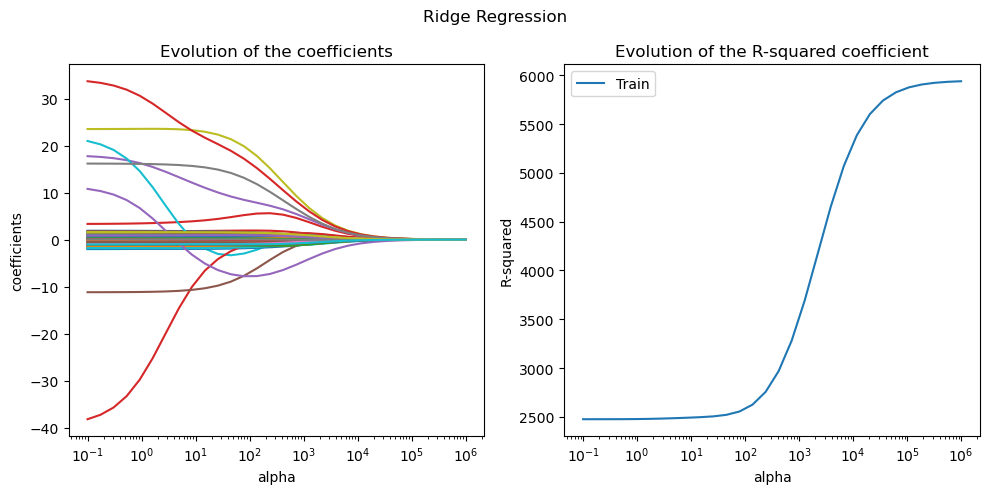

In [16]:
coefficients("Ridge", alphas, X_train, y_train)

Run the code for Lasso as explained in Point 4. Run the code for 30 different values of the penalty
parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^2$

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.858e+04, toleranc

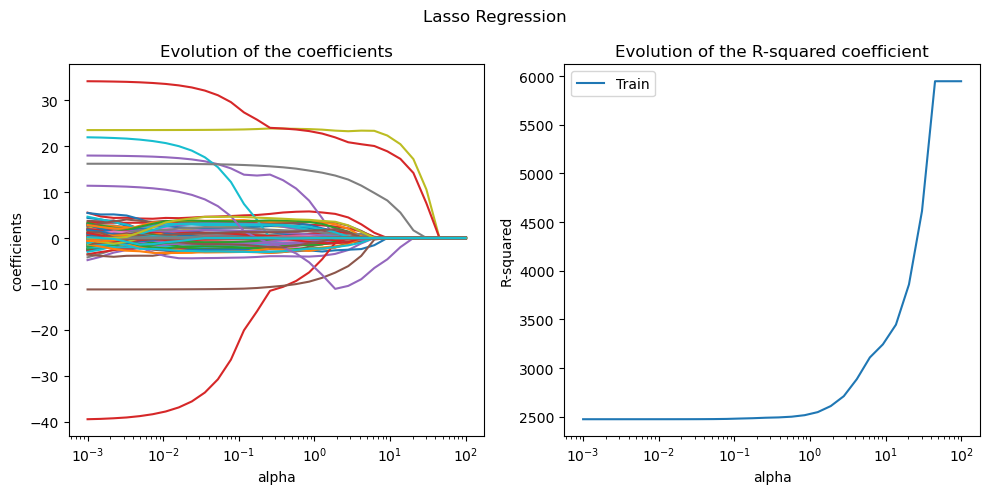

In [17]:
alphas = np.logspace(-3, 2, 30)
coefficients("Lasso", alphas, X_train, y_train)

Run the code for ElasticNet as explained in Point 4. Run the code for 30 different values of the
penalty parameter, which should be on a logarithmic scale between $10^{-3}$ and $10^2$.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.132e+05, toleranc

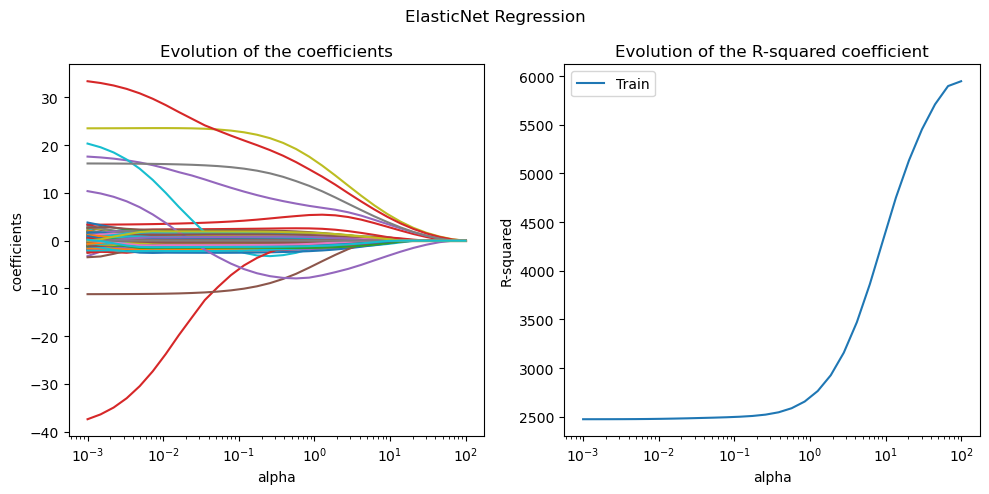

In [18]:
coefficients("ElasticNet", alphas, X_train, y_train)

# PCR

Compute the singular value decomposition of the covariance matrix. For consistency in the notation
use $U, s, V = SVD(X^T X)$.

In [19]:
# Compute the singular valule decomposition of the covariance matrix of the training set (U, s and V)

U, s, V = np.linalg.svd(X_train.T.dot(X_train))

1. Plot a heatmap of the covariance matrix.

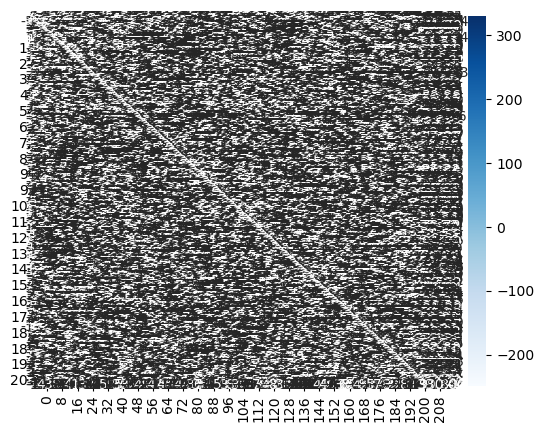

In [20]:
# Plot a heatmap of the covariance matrix.

import seaborn as sns

sns.heatmap(X_train.T.dot(X_train), annot=True, fmt='.2f', cmap='Blues')
plt.show()

2. Compute the PCA for the data using the SVD

In [21]:
# Compute the PCA for the data using the SVD

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

3. Plot the amount of variance explained by the first $k$ components for $k \in 2 \cdots p.$ How many
variables do we need to explain more than 90% of the variance?